# Sesión 6 - Aprendizaje supervisado

    • Regresión lineal
    • Regresión logística
    • Árboles de decisión
    • Bosques aleatorios
    • Métricas de evaluación

Alan Badillo Salas

*Viernes 17, octubre 2025.*

## Regresión lineal

Dadas las características $X$ expresadas en forma matricial, queremos ajustar mediante un modelo lineal el comportamiento de una respuesta $y$.

Podemos pensar que la matriz $X = (x_1 \mid x_2 \mid ... \mid x_k)$ se compone de los vectores $x_1, x_2, ..., x_k$, es decir, variables aleatorias numéricas que explican la respuesta mediante los coefiencientes de regresión (parámetros desconocidos) en el modelo: 

$$
y = \beta_0 + \beta_1 x_1 + \beta_2 x2 + \ldots + \beta_k x_k
$$

In [1]:
import pandas
import seaborn

In [2]:
students = pandas.read_csv("student_habits_performance.csv")

students.head()

,student_id,age,gender,study_hours_per_day,social_media_hours,netflix_hours,part_time_job,attendance_percentage,sleep_hours,diet_quality,exercise_frequency,parental_education_level,internet_quality,mental_health_rating,extracurricular_participation,exam_score
0,S1000,23,Female,0.0,1.2,1.1,No,85.0,8.0,Fair,6,Master,Average,8,Yes,56.2
1,S1001,20,Female,6.9,2.8,2.3,No,97.3,4.6,Good,6,High School,Average,8,No,100.0
2,S1002,21,Male,1.4,3.1,1.3,No,94.8,8.0,Poor,1,High School,Poor,1,No,34.3
3,S1003,23,Female,1.0,3.9,1.0,No,71.0,9.2,Poor,4,Master,Good,1,Yes,26.8
4,S1004,19,Female,5.0,4.4,0.5,No,90.9,4.9,Fair,3,Master,Good,1,No,66.4


In [3]:
students.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   student_id                     1000 non-null   object 
 1   age                            1000 non-null   int64  
 2   gender                         1000 non-null   object 
 3   study_hours_per_day            1000 non-null   float64
 4   social_media_hours             1000 non-null   float64
 5   netflix_hours                  1000 non-null   float64
 6   part_time_job                  1000 non-null   object 
 7   attendance_percentage          1000 non-null   float64
 8   sleep_hours                    1000 non-null   float64
 9   diet_quality                   1000 non-null   object 
 10  exercise_frequency             1000 non-null   int64  
 11  parental_education_level       909 non-null    object 
 12  internet_quality               1000 non-null   ob

<Axes: xlabel='study_hours_per_day', ylabel='exam_score'>

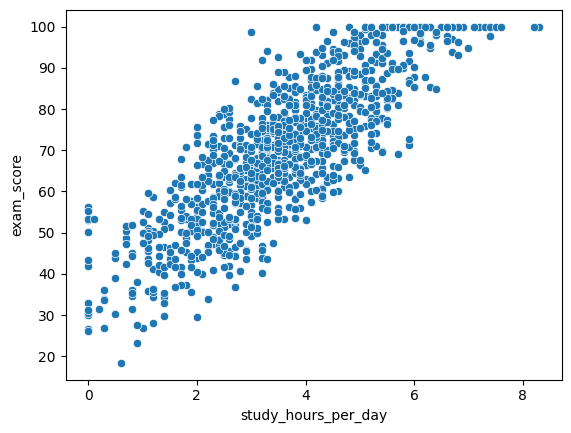

In [4]:
x = students["study_hours_per_day"] # Continua: Espacio de la característica es continuo (no acotado)
y = students["exam_score"] # Continua: Espacio de respuesta es continuo (acotado entre 0 y 100)

seaborn.scatterplot(x=x, y=y)

<Axes: xlabel='study_hours_per_day', ylabel='exam_score'>

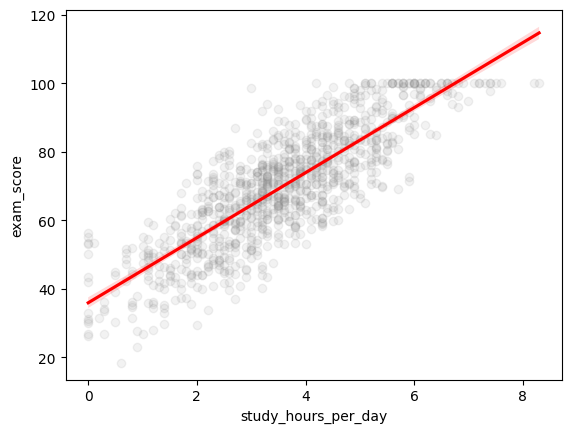

In [14]:
seaborn.regplot(x=x, y=y, 
                scatter_kws={
                    "color": "grey",
                    "alpha": 0.1
                }, 
                line_kws={
                    "color": "red"
                }
)

In [15]:
y.corr(x)

np.float64(0.8254185093960439)

<Axes: ylabel='Density'>

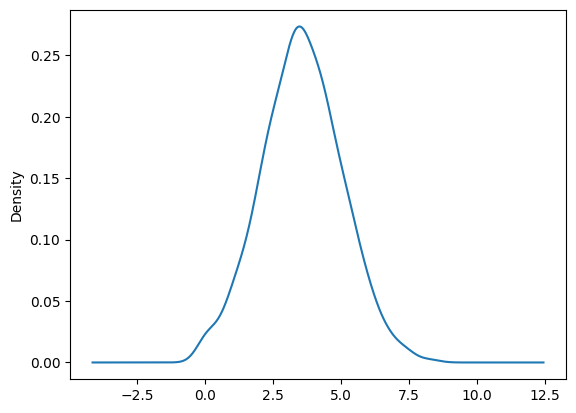

In [16]:
x.plot.density()

## Modelo de regresión lineal simple

$$
y = \beta_0 + \beta_1 x
$$

In [ ]:
! python -m pip install scipy

In [18]:
from scipy.stats import linregress

result = linregress(x, y)

result

LinregressResult(slope=np.float64(9.49025040589683), intercept=np.float64(35.91016203402566), rvalue=np.float64(0.8254185093960439), pvalue=np.float64(4.5957014533492234e-250), stderr=np.float64(0.20545585457773355), intercept_stderr=np.float64(0.7893005884192802))

In [20]:
b0 = result.intercept
b1 = result.slope

print(f"y = {b0:.2f} + {b1:.2f} x")

y = 35.91 + 9.49 x


In [ ]:
import numpy

xs = numpy.linspace(0, 9, 37) # 0.25 - hora -> vector de 37 entradas
yp = b0 + b1 * xs # -> vector de 37 entradas

In [50]:
pandas.DataFrame([xs, yp], index=["xs", "yp"]).T

,xs,yp
0,0.00,35.910162
1,0.25,38.282725
2,0.50,40.655287
3,0.75,43.027850
4,1.00,45.400412
5,1.25,47.772975
6,1.50,50.145538
7,1.75,52.518100
8,2.00,54.890663
9,2.25,57.263225


<Axes: xlabel='study_hours_per_day', ylabel='exam_score'>

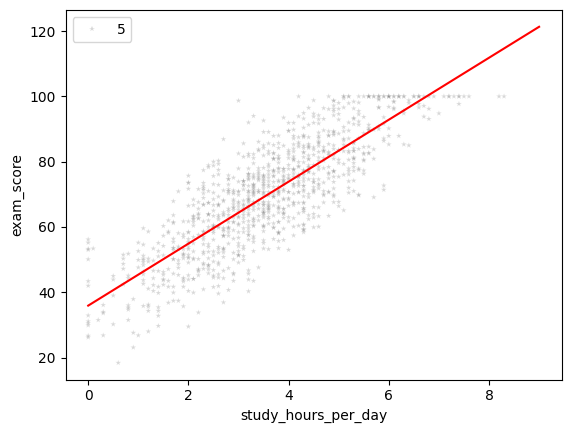

In [75]:
seaborn.lineplot(x=xs, y=yp, color="red")
seaborn.scatterplot(x=x, y=y, color="gray", alpha=0.3, size=5, marker="*")

## Regresión logística

Cuando la respuesta esperada es categórica, podemos centrarnos en determinar si un conjunto de características pertenecerá a una sola categoría (una sola respuesta). A este problema se le conoce como de *respuesta binaria* y crea el problema de clasificación.

$$
y = \phi(\beta_0 + \beta_1 x_1 + \beta_2 x_2 + \ldots + \beta_k x_k)
$$

donde $\phi(•)$ es la función logística o sigmoide dada por:

$$
\phi(\cdot) = \frac{\exp\!\;(\cdot)}{1 + \exp\!\;(\cdot)}
$$


In [79]:
import numpy

def phi(z):
    return numpy.exp(z) / (1 + numpy.exp(z))

<Axes: >

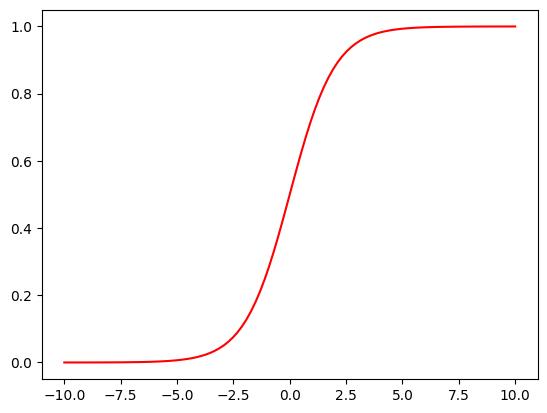

In [ ]:
xs = numpy.linspace(-10, 10, 100)

yp = phi(0 + 1 * xs)

seaborn.lineplot(x=xs, y=yp, color="red")

In [ ]:
! python -m pip install statsmodels

<Axes: xlabel='study_hours_per_day', ylabel='extracurricular_participation'>

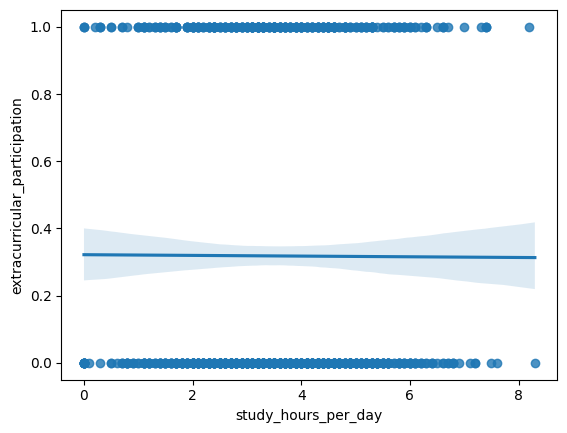

In [90]:
x = students["study_hours_per_day"] # Continua
y = (students["extracurricular_participation"] == "Yes").astype(int) # Binaria

seaborn.regplot(x=x, y=y, logistic=True)

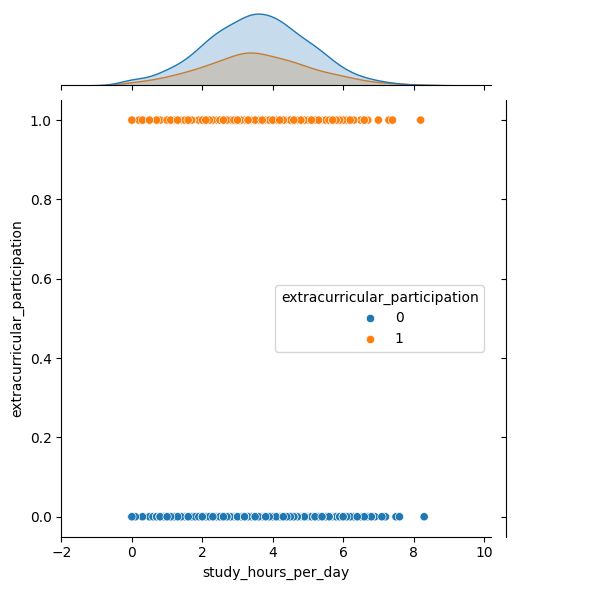

In [91]:
seaborn.jointplot(x=x, y=y, hue=y)

<Axes: xlabel='study_hours_per_day', ylabel='exam_score'>

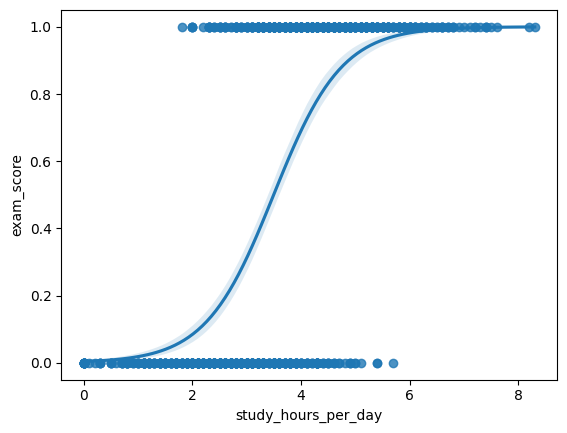

In [92]:
x = students["study_hours_per_day"] # Continua
y = (students["exam_score"] >= 70).astype(int) # Binaria

seaborn.regplot(x=x, y=y, logistic=True)

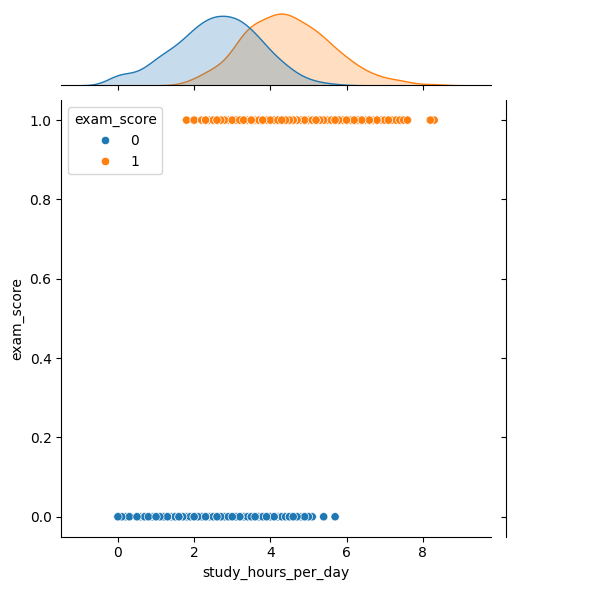

In [93]:
seaborn.jointplot(x=x, y=y, hue=y)

In [ ]:
! python -m pip install scikit-learn

In [103]:
from sklearn.linear_model import LogisticRegression

X = students[["study_hours_per_day"]]
y = (students["exam_score"] >= 70).astype(int)

# Machine Learning Model -> .fit(X, y) | .predict(X')
model = LogisticRegression()

model.fit(X, y)

# b0                  b1, ..., bk
model.intercept_, model.coef_

(array([-5.51405765]), array([[1.57797601]]))

In [104]:
numpy.exp(1.58)

np.float64(4.854955811237434)

In [106]:
b0 = model.intercept_[0]
b1 = model.coef_[0][0]

print(f"y = phi({b0:.2f} + {b1:.2f} x)")

y = phi(-5.51 + 1.58 x)


<Axes: xlabel='study_hours_per_day', ylabel='exam_score'>

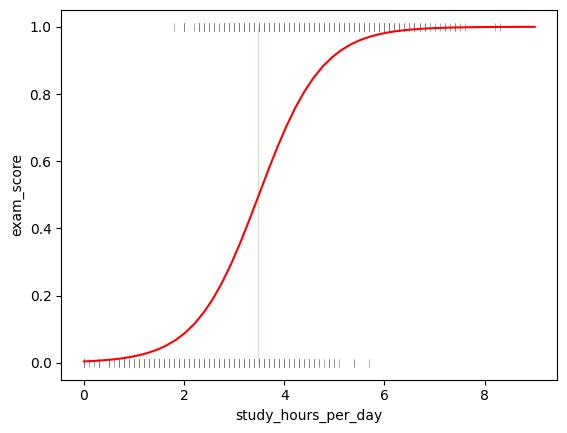

In [117]:
xs = numpy.linspace(0, 9)
yp = phi(b0 + b1 * xs)

x = students["study_hours_per_day"] # Continua
y = (students["exam_score"] >= 70).astype(int) # Binaria

seaborn.lineplot(x=xs, y=yp, color="red")
seaborn.scatterplot(x=x, y=y, marker="|", color="gray")
seaborn.lineplot(x=[3.48, 3.48], y=[0, 1], color="green")

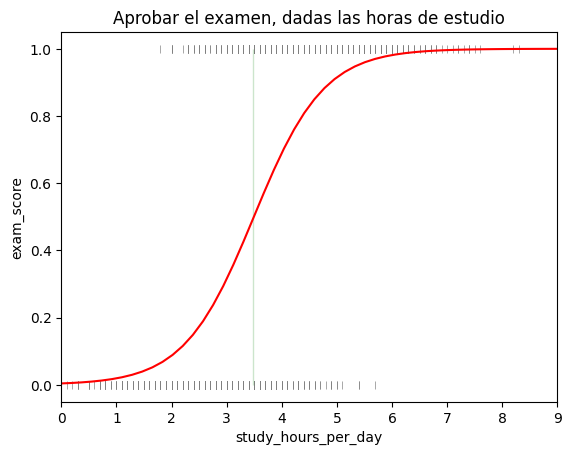

In [118]:
import matplotlib.pyplot as pyplot

xs = numpy.linspace(0, 9)
yp = phi(b0 + b1 * xs)

x = students["study_hours_per_day"] # Continua
y = (students["exam_score"] >= 70).astype(int) # Binaria

seaborn.lineplot(x=xs, y=yp, color="red")
seaborn.scatterplot(x=x, y=y, marker="|", color="gray")
seaborn.lineplot(x=[3.48, 3.48], y=[0, 1], color="green")

pyplot.xlim((0, 9))
pyplot.title("Aprobar el examen, dadas las horas de estudio")
pyplot.show()

## Árbol de decisión

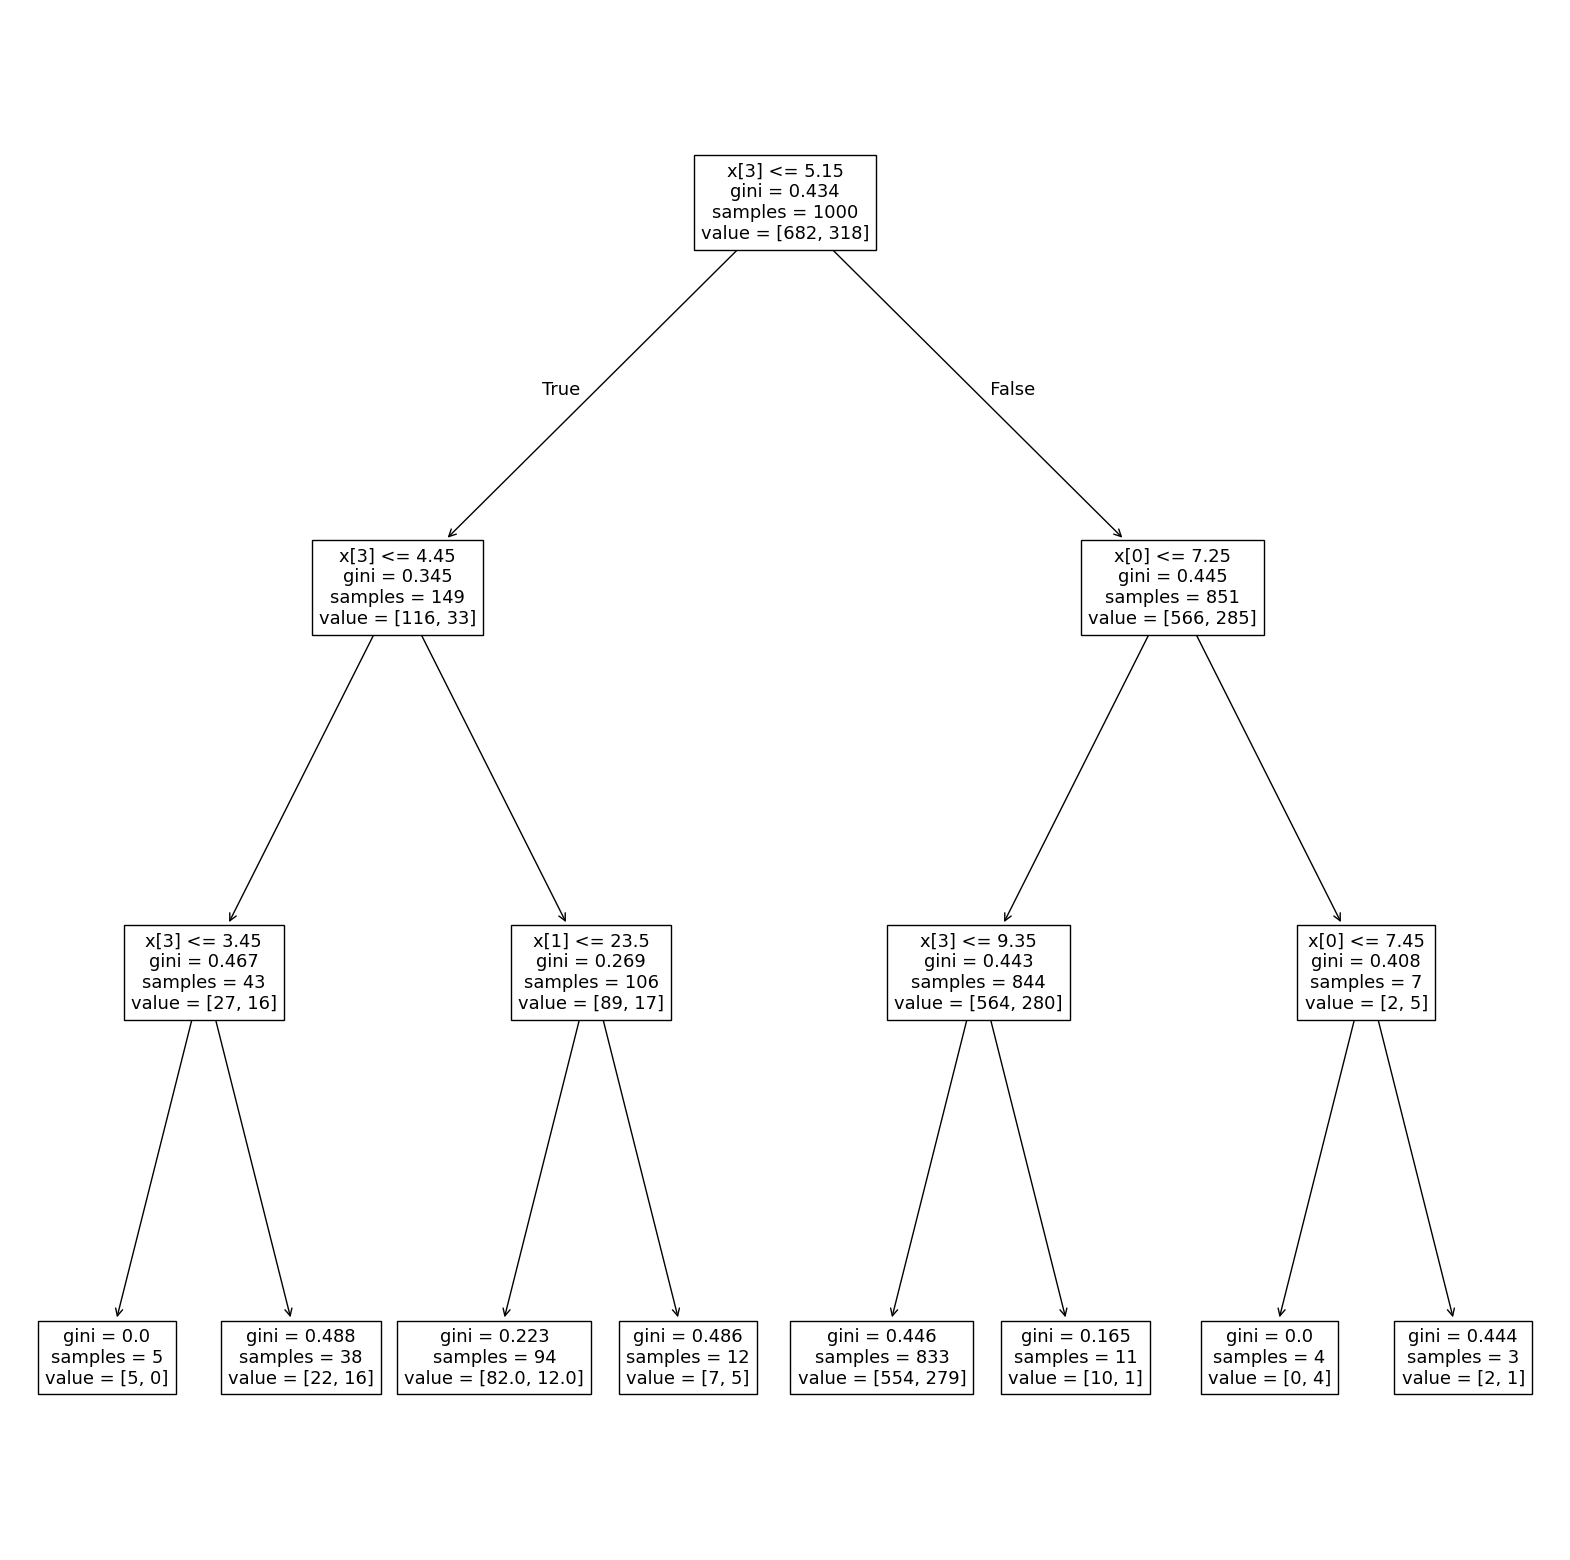

In [125]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
import matplotlib.pyplot as pyplot

# Modelo de Machine Learning -> .fit(X, y) -> .predict(X')

students["gender_num"] = students["gender"].map({
    "Male": 1,
    "Female": 0
})

X = students[["study_hours_per_day", "age", "gender_num", "sleep_hours"]]
y = students["extracurricular_participation"]

model = DecisionTreeClassifier(max_depth=3)

model.fit(X, y)

fig, ax = pyplot.subplots(figsize=(20, 20))
plot_tree(model, ax=ax)
pyplot.show()